# Multiple Linear Regression Assignment

#### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:
- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

### Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Importing Libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
import statsmodels.api as sm

In [4]:
car_data = pd.read_csv('./CarPrice_Assignment.csv')

In [5]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
car_data.shape

(205, 26)

In [7]:
car_data.info()
car_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Step 2: Data Preparation and Visualization

We'll be combining both the steps here so that we can visualize along with prepare the data side by side to get a better picture of what insights we're generating from the data.
Here we'll perform several bits of analysis to help understand the data. The portion will cover exploratory data analysis and then delve into getting an idea of what are the most important predictor variables affecting the prices of cars, and if there are any factor exhibiting the property of multicollinearity

#### Exploratory Data Analysis

Let's begin with checking the number of values in each column, and the presence of any null values

In [8]:
car_data.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [9]:
#checking for null values
car_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
car_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

We observe that all columns have atleast more than 1 unique value, hence all of them can be considered for modelling.
Also, Since we observe that there are no null values, let's go ahead with the exploratory analysis to identify any patterns that we can see straight up from the data.

In [11]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Data Cleaning: We've been told that the CarName variable needs to be ammended to only include the name of the car company and not the car model

In [12]:
# Remove everything after the frist space in the column
car_data['CarCompany'] = car_data['CarName'].str.split(" ").str[0]

In [13]:
car_data['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [14]:
# Make the spelling of nissan uniform
car_data['CarCompany'] = car_data['CarCompany'].str.replace('Nissan', 'nissan')

# Make the spelling of mazda uniform
car_data['CarCompany'] = car_data['CarCompany'].str.replace('maxda', 'mazda')

# Make the spelling of porsche uniform
car_data['CarCompany'] = car_data['CarCompany'].str.replace('porcshce', 'porsche')

# Make the spelling of toyota uniform
car_data['CarCompany'] = car_data['CarCompany'].str.replace('toyouta', 'toyota')

# Make the spelling of volkswagen uniform
car_data['CarCompany'] = car_data['CarCompany'].str.replace('vokswagen', 'volkswagen')
car_data['CarCompany'] = car_data['CarCompany'].str.replace('vw', 'volkswagen')


In [15]:
car_data['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [16]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


Now, let's look to add any business-related/data-driven derived metrics that may have an impact on the price of the car. The new metrics that can be derived from the data and have a business relation with it include:
- Power to Weight Ratio
- Torque (Horsepower * 5252 / RPM)
- Fuel Economy or Average Mileage (1 / ((0.55/City Mileage) + (0.45/Highway Mileage)) )

In [17]:
# Add the power to weight ratio
car_data['pow_wt_ratio'] = car_data['horsepower']/car_data['curbweight']

In [18]:
# Add the average mileage/fuel economy
car_data['avg_mileage'] = 1 / ((0.55/car_data['citympg'])+(0.45/car_data['highwaympg']))

In [19]:
# Add the Torque
car_data['torque'] = car_data['horsepower'] * 5252 / car_data['peakrpm']

In [20]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,pow_wt_ratio,avg_mileage,torque
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000,21,27,13495.0,alfa-romero,0.043564,23.333333,116.594400
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000,21,27,16500.0,alfa-romero,0.043564,23.333333,116.594400
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,9.0,154,5000,19,26,16500.0,alfa-romero,0.054552,21.619256,161.761600
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,10.0,102,5500,24,30,13950.0,audi,0.043646,26.373626,97.400727
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,8.0,115,5500,18,22,17450.0,audi,0.040722,19.603960,109.814545


In [21]:
car_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'CarCompany', 'pow_wt_ratio', 'avg_mileage', 'torque'],
      dtype='object')

Now that we have an exhaustive list of columns (that have been cleaned and are model ready), let's visualize the relationship that each one of them demonstrates with our dependent variable. This will be done separately for numerical and categorical variables - hence for a first step, let's separate these two out. <br>
We'll be ignoring the car_ID column as that is simply a row identifier value

In [22]:
cat_var = ['symboling', 'CarCompany', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 
           'enginetype', 'cylindernumber', 'fuelsystem']
num_var = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
           'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'pow_wt_ratio', 
           'avg_mileage', 'torque']
y_var = ['price']


In [23]:
car_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'CarCompany', 'pow_wt_ratio', 'avg_mileage', 'torque'],
      dtype='object')

In [24]:
for i in range (len(cat_var)):
    print(car_data[cat_var[i]].value_counts())

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
mercury         1
Name: CarCompany, dtype: int64
gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4

There is a problem of **class imbalance** in the engine location variable

We can go ahead and drop these variables as they would skew the test/train sets

In [25]:
car_data.drop(columns=['enginelocation'], inplace=True)

**Visualizing the numerical variables** using a pairplot

In [26]:
car_data[num_var+y_var].head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,pow_wt_ratio,avg_mileage,torque,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,0.043564,23.333333,116.594400,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,0.043564,23.333333,116.594400,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,0.054552,21.619256,161.761600,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,0.043646,26.373626,97.400727,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,0.040722,19.603960,109.814545,17450.0


<Figure size 1800x720 with 0 Axes>

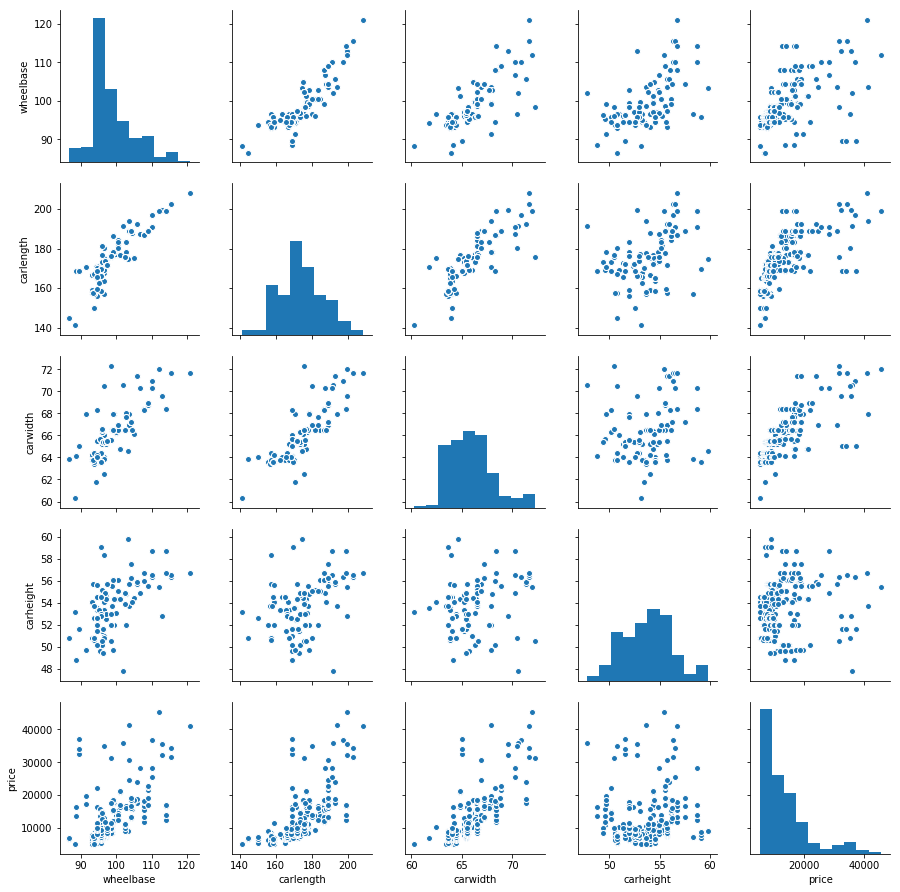

In [27]:
# Since the number of numerical variables are plenty, we'll go about visualizing them in parts
plt.figure(figsize=(25,10))
sns.pairplot(car_data[num_var[0:4]+y_var])
plt.show()

<Figure size 1800x720 with 0 Axes>

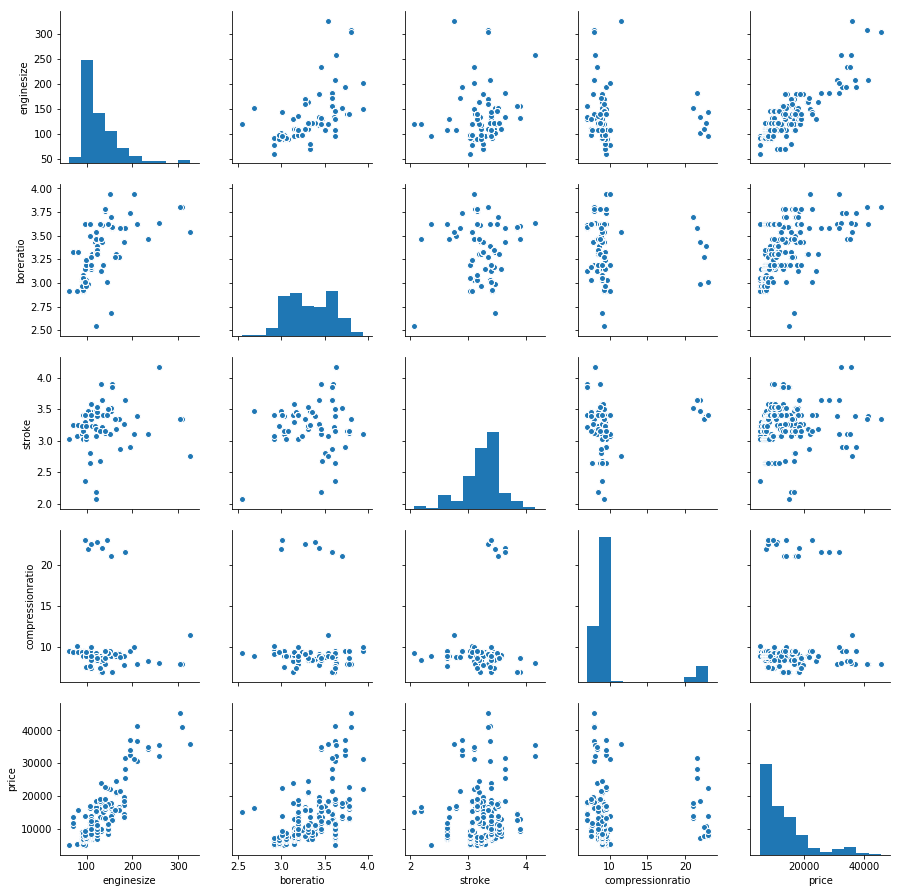

In [28]:
plt.figure(figsize=(25,10))
sns.pairplot(car_data[num_var[5:9]+y_var])
plt.show()

<Figure size 1800x720 with 0 Axes>

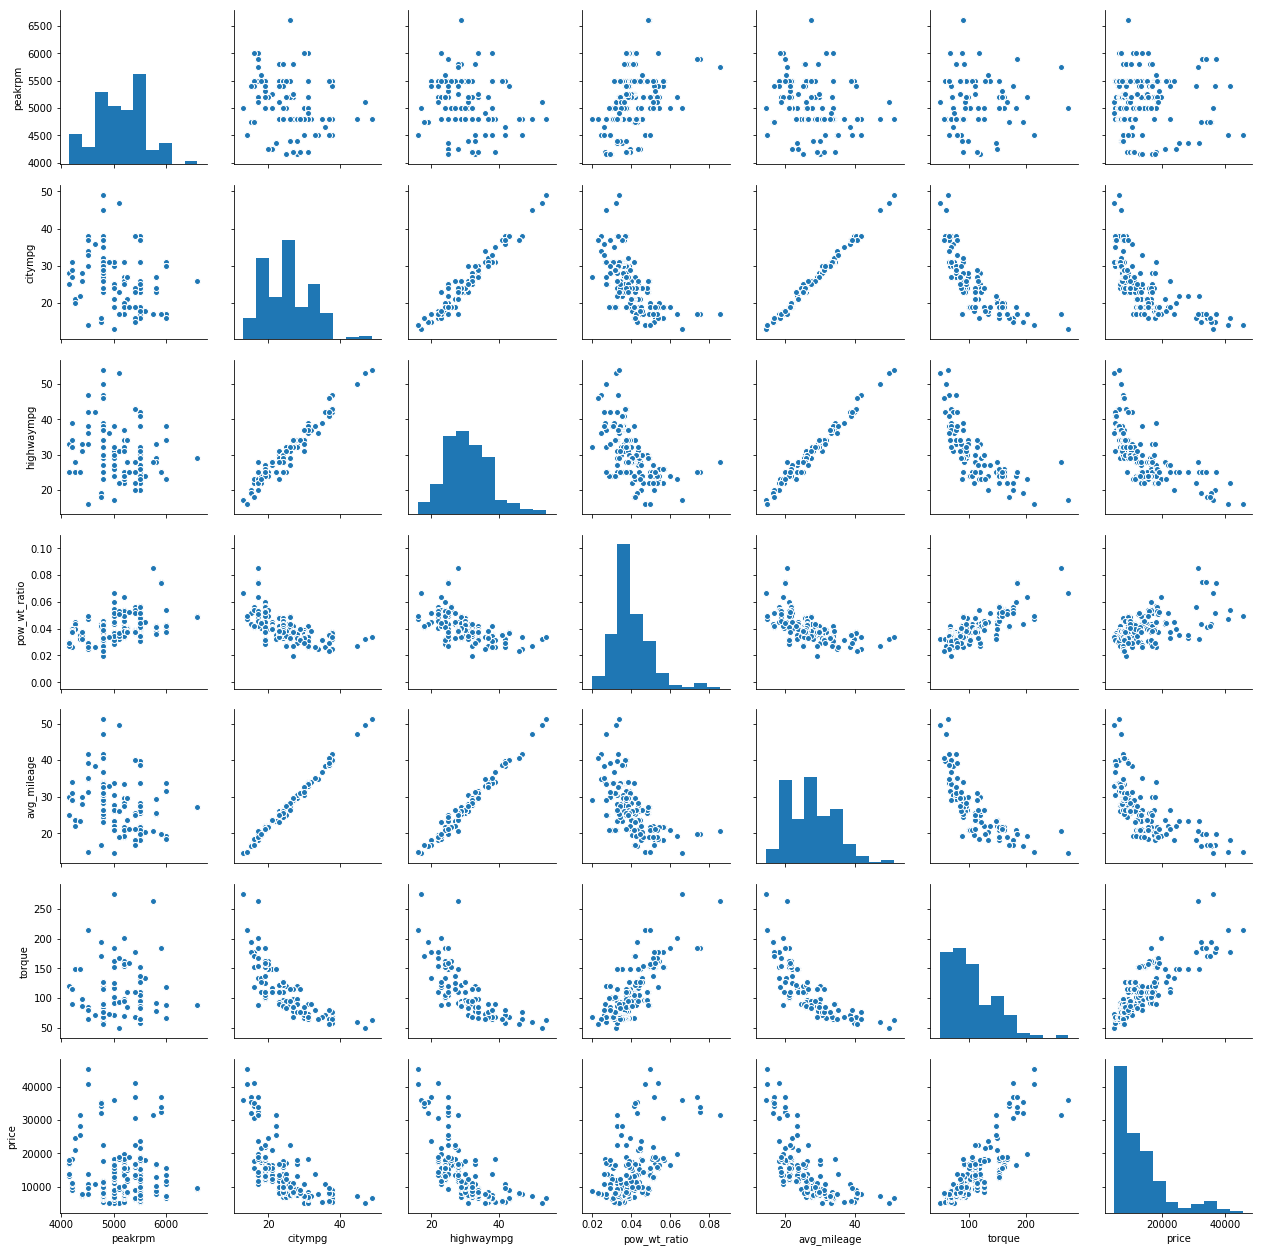

In [29]:
plt.figure(figsize=(25,10))
sns.pairplot(car_data[num_var[10:]+y_var])
plt.show()

Looking at the scatter plots, we can see that there seems to be difinte linear relationships between the price variable and curbweight, carwidth, carlength, boreratio, enginesize, citympg, highwaympg, pow_wt_ratio, avg_mileage, torque

Alongide this, however, we do see that there is a linear relationships between the independent variables too. For example, highwaympg and citympg, boreratio and enginesize, carwidth and wheelbase etc.

**Visualizing the categorical variables** using boxplots

In [30]:
cat_var = ['symboling', 'CarCompany', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
 'enginetype', 'cylindernumber', 'fuelsystem', 'fueltype']

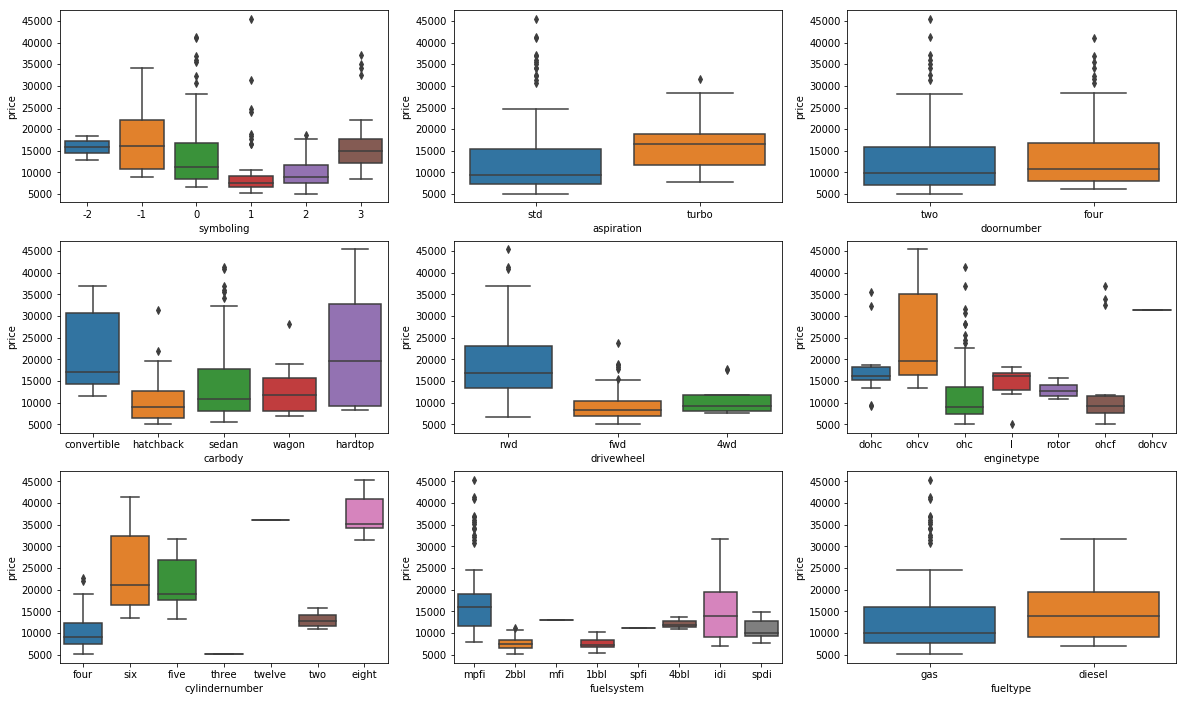

In [31]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = cat_var[0], y = y_var[0], data = car_data)
plt.subplot(3,3,2)
sns.boxplot(x = cat_var[2], y = y_var[0], data = car_data)
plt.subplot(3,3,3)
sns.boxplot(x = cat_var[3], y = y_var[0], data = car_data)
plt.subplot(3,3,4)
sns.boxplot(x = cat_var[4], y = y_var[0], data = car_data)
plt.subplot(3,3,5)
sns.boxplot(x = cat_var[5], y = y_var[0], data = car_data)
plt.subplot(3,3,6)
sns.boxplot(x = cat_var[6], y = y_var[0], data = car_data)
plt.subplot(3,3,7)
sns.boxplot(x = cat_var[7], y = y_var[0], data = car_data)
plt.subplot(3,3,8)
sns.boxplot(x = cat_var[8], y = y_var[0], data = car_data)
plt.subplot(3,3,9)
sns.boxplot(x = cat_var[9], y = y_var[0], data = car_data)
plt.show()

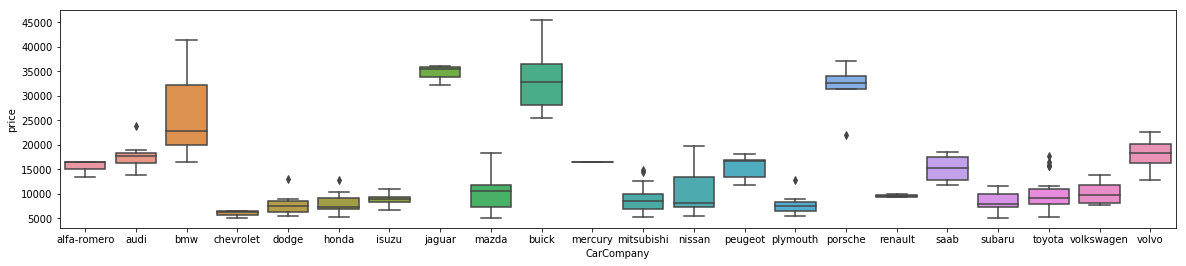

In [32]:
plt.figure(figsize=(20, 4))
sns.boxplot(x = cat_var[1], y = y_var[0], data = car_data)
plt.show()

Lookng at the categorical variable distribution, we can observe some interesting insights:

- number of doors doesn't seem to be a major factor affecting the price
- convertibles and hardtops are among the expensive cars in terms of carbody
- rear wheel drive cars are expensive compared to others
- the car brand by the company seems to be a major factor in the price of the car

To understand if we have a number of categorical factors affecting the prices in combination, let's combine the variables and observe the effect on the price

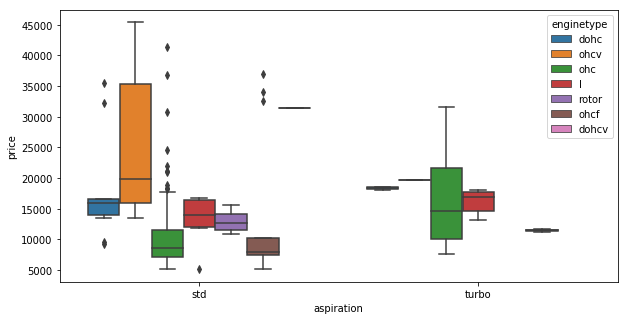

In [33]:
# impact of aspiration on price aling with the enginetype
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'aspiration', y = 'price', hue = 'enginetype', data = car_data)
plt.show()

We can see that turbo cars with ihc enginetypes have a high price whereas in the case of standard cars, the cars with the ohcv engine types are costlier

Now that we've developed an inderstanding what the data is telling us, how the independent variables are looking in line with each other and the dependent variables, let's go ahead and work on preparing our dataset to make it ready for modelling

-------------------------------------------------------------------------------------------------------------------------------------------------------<br>
**Encoding the categorical variables**
This step is needed to ensure that the categorical values can be used by our model in a mathematical format for prediction purposes<br><br>
Let's have a look at the distinct levels within each of the categorical variables


In [34]:
car_data[cat_var].nunique()

symboling          6
CarCompany        22
aspiration         2
doornumber         2
carbody            5
drivewheel         3
enginetype         7
cylindernumber     7
fuelsystem         8
fueltype           2
dtype: int64

We can convert all the _categorical variables that have 2 levels_ into binary format [0,1]

The aspiration variable:

In [35]:
print(car_data['aspiration'].value_counts())

def binary_map(x):
    return x.map({"std": 1, "turbo": 0})

# Applying the function to the housing list
car_data[['aspiration']] = car_data[['aspiration']].apply(binary_map)

std      168
turbo     37
Name: aspiration, dtype: int64


In [36]:
car_data['aspiration'].value_counts()

1    168
0     37
Name: aspiration, dtype: int64

The fueltype variable

In [37]:
print(car_data['fueltype'].value_counts())

def binary_map(x):
    return x.map({"diesel": 1, "gas": 0})

# Applying the function to the housing list
car_data[['fueltype']] = car_data[['fueltype']].apply(binary_map)

gas       185
diesel     20
Name: fueltype, dtype: int64


The door number variable:

In [38]:
print(car_data['doornumber'].value_counts())

def binary_map(x):
    return x.map({"four": 1, "two": 0})

# Applying the function to the housing list
car_data[['doornumber']] = car_data[['doornumber']].apply(binary_map)

four    115
two      90
Name: doornumber, dtype: int64


In [39]:
car_data['doornumber'].value_counts()

1    115
0     90
Name: doornumber, dtype: int64

Having encoded the categorical variables that have just 2 levels - we can go ahead and treat the variables with more than 2 levels. In order to do this, we'll need to create **dummy variables**

In [40]:
# The symboling variable
symboling_levels = pd.get_dummies(car_data['symboling'], drop_first = True)

In [41]:
symboling_levels.head()

,-1,0,1,2,3
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [42]:
# Lets rename the columns before appending to the main data frame so that we can keep track of the variables
symboling_levels.columns = ['sym_neg_one', 'sym_zero', 'sym_one', 'sym_two', 'sym_three']

In [43]:
symboling_levels.head()

,sym_neg_one,sym_zero,sym_one,sym_two,sym_three
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [44]:
# Add the variable to the original dataframe
car_data = pd.concat([car_data, symboling_levels], axis = 1)

In [45]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,price,CarCompany,pow_wt_ratio,avg_mileage,torque,sym_neg_one,sym_zero,sym_one,sym_two,sym_three
0,1,3,alfa-romero giulia,0,1,0,convertible,rwd,88.6,168.8,...,13495.0,alfa-romero,0.043564,23.333333,116.594400,0,0,0,0,1
1,2,3,alfa-romero stelvio,0,1,0,convertible,rwd,88.6,168.8,...,16500.0,alfa-romero,0.043564,23.333333,116.594400,0,0,0,0,1
2,3,1,alfa-romero Quadrifoglio,0,1,0,hatchback,rwd,94.5,171.2,...,16500.0,alfa-romero,0.054552,21.619256,161.761600,0,0,1,0,0
3,4,2,audi 100 ls,0,1,1,sedan,fwd,99.8,176.6,...,13950.0,audi,0.043646,26.373626,97.400727,0,0,0,1,0
4,5,2,audi 100ls,0,1,1,sedan,4wd,99.4,176.6,...,17450.0,audi,0.040722,19.603960,109.814545,0,0,0,1,0


Do this for the rest of the multi-level categorical variables

In [46]:
# The Car Company variable
carcompany_levels = pd.get_dummies(car_data['CarCompany'], drop_first= True)
car_data = pd.concat([car_data, carcompany_levels], axis = 1)

# The carbody variable
carbody_levels = pd.get_dummies(car_data['carbody'], drop_first= True)
car_data = pd.concat([car_data, carbody_levels], axis = 1)

In [47]:
# The cylindernumber variable
cylindernum_levels = pd.get_dummies(car_data['cylindernumber'], drop_first= True)

# Change the column names
cylindernum_levels.columns = ['cylinder_five', 'cylinder_four', 'cylinder_six', 'cylinder_three', 'cylinder_twelve', 'cylinder_two']

#Add to dataframe
car_data = pd.concat([car_data, cylindernum_levels], axis = 1)

In [48]:
# The fuelsystem variable
fuelsys_levels = pd.get_dummies(car_data['fuelsystem'], drop_first= True)

#Change the column names
fuelsys_levels.columns = ['fuelsys_2bbl', 'fuelsys_4bbl', 'fuelsys_idi', 'fuelsys_mfi', 'fuelsys_mpfi', 'fuelsys_spdi', 'fuelsys_spfi']

#Add to dataframe
car_data = pd.concat([car_data, fuelsys_levels], axis = 1)

In [49]:
#The enginetype variable
enginetype_levels = pd.get_dummies(car_data['enginetype'], drop_first= True)

# Change the column names
enginetype_levels.columns = ['engtype_dohcv','engtype_l','engtype_ohc', 'engtype_ohcf', 'engtype_ohcv', 'engtype_rotor']

# Add to dataframe
car_data = pd.concat([car_data, enginetype_levels], axis = 1)

In [50]:
# The drivewheel variable
drivewheel_levels = pd.get_dummies(car_data['drivewheel'], drop_first= True)

# Change column names
drivewheel_levels.columns = ['drivewhl_fwd', 'drivewhl_rwd']

# Add to dataframe
car_data = pd.concat([car_data, drivewheel_levels], axis = 1)

In [51]:
car_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'CarCompany',
       'pow_wt_ratio', 'avg_mileage', 'torque', 'sym_neg_one', 'sym_zero',
       'sym_one', 'sym_two', 'sym_three', 'audi', 'bmw', 'buick', 'chevrolet',
       'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'cylinder_five', 'cylinder_four', 'cylinder_six',
       'cylinder_three', 'cylinder_twelve', 'cylinder_two', 'fuelsys_2bbl',
       'fuelsys_4bbl', 'fuelsys_idi', 'fuelsys_mfi', 'fuelsys_mpfi',
       'fuelsys_spdi', 'fuels

In [52]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,fuelsys_spdi,fuelsys_spfi,engtype_dohcv,engtype_l,engtype_ohc,engtype_ohcf,engtype_ohcv,engtype_rotor,drivewhl_fwd,drivewhl_rwd
0,1,3,alfa-romero giulia,0,1,0,convertible,rwd,88.6,168.8,...,0,0,0,0,0,0,0,0,0,1
1,2,3,alfa-romero stelvio,0,1,0,convertible,rwd,88.6,168.8,...,0,0,0,0,0,0,0,0,0,1
2,3,1,alfa-romero Quadrifoglio,0,1,0,hatchback,rwd,94.5,171.2,...,0,0,0,0,0,0,1,0,0,1
3,4,2,audi 100 ls,0,1,1,sedan,fwd,99.8,176.6,...,0,0,0,0,1,0,0,0,1,0
4,5,2,audi 100ls,0,1,1,sedan,4wd,99.4,176.6,...,0,0,0,0,1,0,0,0,0,0


In [53]:
car_data.describe()

,car_ID,symboling,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,...,fuelsys_spdi,fuelsys_spfi,engtype_dohcv,engtype_l,engtype_ohc,engtype_ohcf,engtype_ohcv,engtype_rotor,drivewhl_fwd,drivewhl_rwd
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,0.097561,0.819512,0.560976,98.756585,174.049268,65.907805,53.724878,2555.565854,...,0.043902,0.004878,0.004878,0.058537,0.721951,0.073171,0.063415,0.019512,0.585366,0.370732
std,59.322565,1.245307,0.297446,0.385535,0.497483,6.021776,12.337289,2.145204,2.443522,520.680204,...,0.205380,0.069843,0.069843,0.235330,0.449134,0.261054,0.244304,0.138655,0.493865,0.484183
min,1.000000,-2.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,0.000000,0.000000,1.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,103.000000,1.000000,0.000000,1.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,154.000000,2.000000,0.000000,1.000000,1.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,205.000000,3.000000,1.000000,1.000000,1.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now - drop all the columns that we created dummies for

In [54]:
car_data.drop(['symboling', 'CarCompany', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem', 'car_ID', 'CarName'], axis=1, inplace=True)

In [55]:
car_data.columns

Index(['fueltype', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'pow_wt_ratio', 'avg_mileage', 'torque',
       'sym_neg_one', 'sym_zero', 'sym_one', 'sym_two', 'sym_three', 'audi',
       'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'cylinder_five',
       'cylinder_four', 'cylinder_six', 'cylinder_three', 'cylinder_twelve',
       'cylinder_two', 'fuelsys_2bbl', 'fuelsys_4bbl', 'fuelsys_idi',
       'fuelsys_mfi', 'fuelsys_mpfi', 'fuelsys_spdi', 'fuelsys_spfi',
       'engtype_dohcv', 'engtype_l', 'engtype_ohc', 'engtype_ohcf',
       'engtype_ohcv', 'engtype_rotor', 'drivewhl_fwd',

In [56]:
car_data.head()

,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,fuelsys_spdi,fuelsys_spfi,engtype_dohcv,engtype_l,engtype_ohc,engtype_ohcf,engtype_ohcv,engtype_rotor,drivewhl_fwd,drivewhl_rwd
0,0,1,0,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,94.5,171.2,65.5,52.4,2823,152,2.68,...,0,0,0,0,0,0,1,0,0,1
3,0,1,1,99.8,176.6,66.2,54.3,2337,109,3.19,...,0,0,0,0,1,0,0,0,1,0
4,0,1,1,99.4,176.6,66.4,54.3,2824,136,3.19,...,0,0,0,0,1,0,0,0,0,0


Now all of our data has been encoded, and we're ready to split it into test/train and proceed with the modelling

### Step 3: Splitting the data into Testing and Training Sets

In [57]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(1)
df_train, df_test = train_test_split(car_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [58]:
print(df_train.shape)
print(df_test.shape)

(143, 71)
(62, 71)


**Rescaling of features**<br>
We now go ahead with rescaling of features which will help serve the following purpose: all the variables will have a comparable scale, and hence the gradient descent procedure for the model will be a lot more optimized.<br>
There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

We will use MinMax scaling as this will not change the distribution of any variable (won't make the mean to become 0 and standard deviation to become 1) <br>

Note - this will be performed independently on the train set i.e. separate from the test set


In [59]:
df_train.columns

Index(['fueltype', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'pow_wt_ratio', 'avg_mileage', 'torque',
       'sym_neg_one', 'sym_zero', 'sym_one', 'sym_two', 'sym_three', 'audi',
       'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'cylinder_five',
       'cylinder_four', 'cylinder_six', 'cylinder_three', 'cylinder_twelve',
       'cylinder_two', 'fuelsys_2bbl', 'fuelsys_4bbl', 'fuelsys_idi',
       'fuelsys_mfi', 'fuelsys_mpfi', 'fuelsys_spdi', 'fuelsys_spfi',
       'engtype_dohcv', 'engtype_l', 'engtype_ohc', 'engtype_ohcf',
       'engtype_ohcv', 'engtype_rotor', 'drivewhl_fwd',

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler = MinMaxScaler()

In [62]:
# Apply scaler() to all the columns except the 'categorical variables variables
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train[['price']] = scaler.fit_transform(df_train[['price']])


In [63]:
df_train.head()

,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,fuelsys_spdi,fuelsys_spfi,engtype_dohcv,engtype_l,engtype_ohc,engtype_ohcf,engtype_ohcv,engtype_rotor,drivewhl_fwd,drivewhl_rwd
122,0,1,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,...,0,0,0,0,1,0,0,0,1,0
125,0,1,0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,...,0,0,0,0,1,0,0,0,0,1
166,0,1,0,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,...,0,0,0,0,0,0,0,0,0,1
199,0,0,1,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,...,0,0,0,0,1,0,0,0,0,1


In [64]:
pd.DataFrame(df_train.describe())

,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,fuelsys_spdi,fuelsys_spfi,engtype_dohcv,engtype_l,engtype_ohc,engtype_ohcf,engtype_ohcv,engtype_rotor,drivewhl_fwd,drivewhl_rwd
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.090909,0.818182,0.559441,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,...,0.041958,0.0,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.594406,0.349650
std,0.288490,0.387050,0.498199,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,...,0.201198,0.0,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.492733,0.478536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,...,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,...,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now, all the numerical variables have been scaled between 0 to 1

Let's check the **correlation coefficients** to see which variables are highly correlated

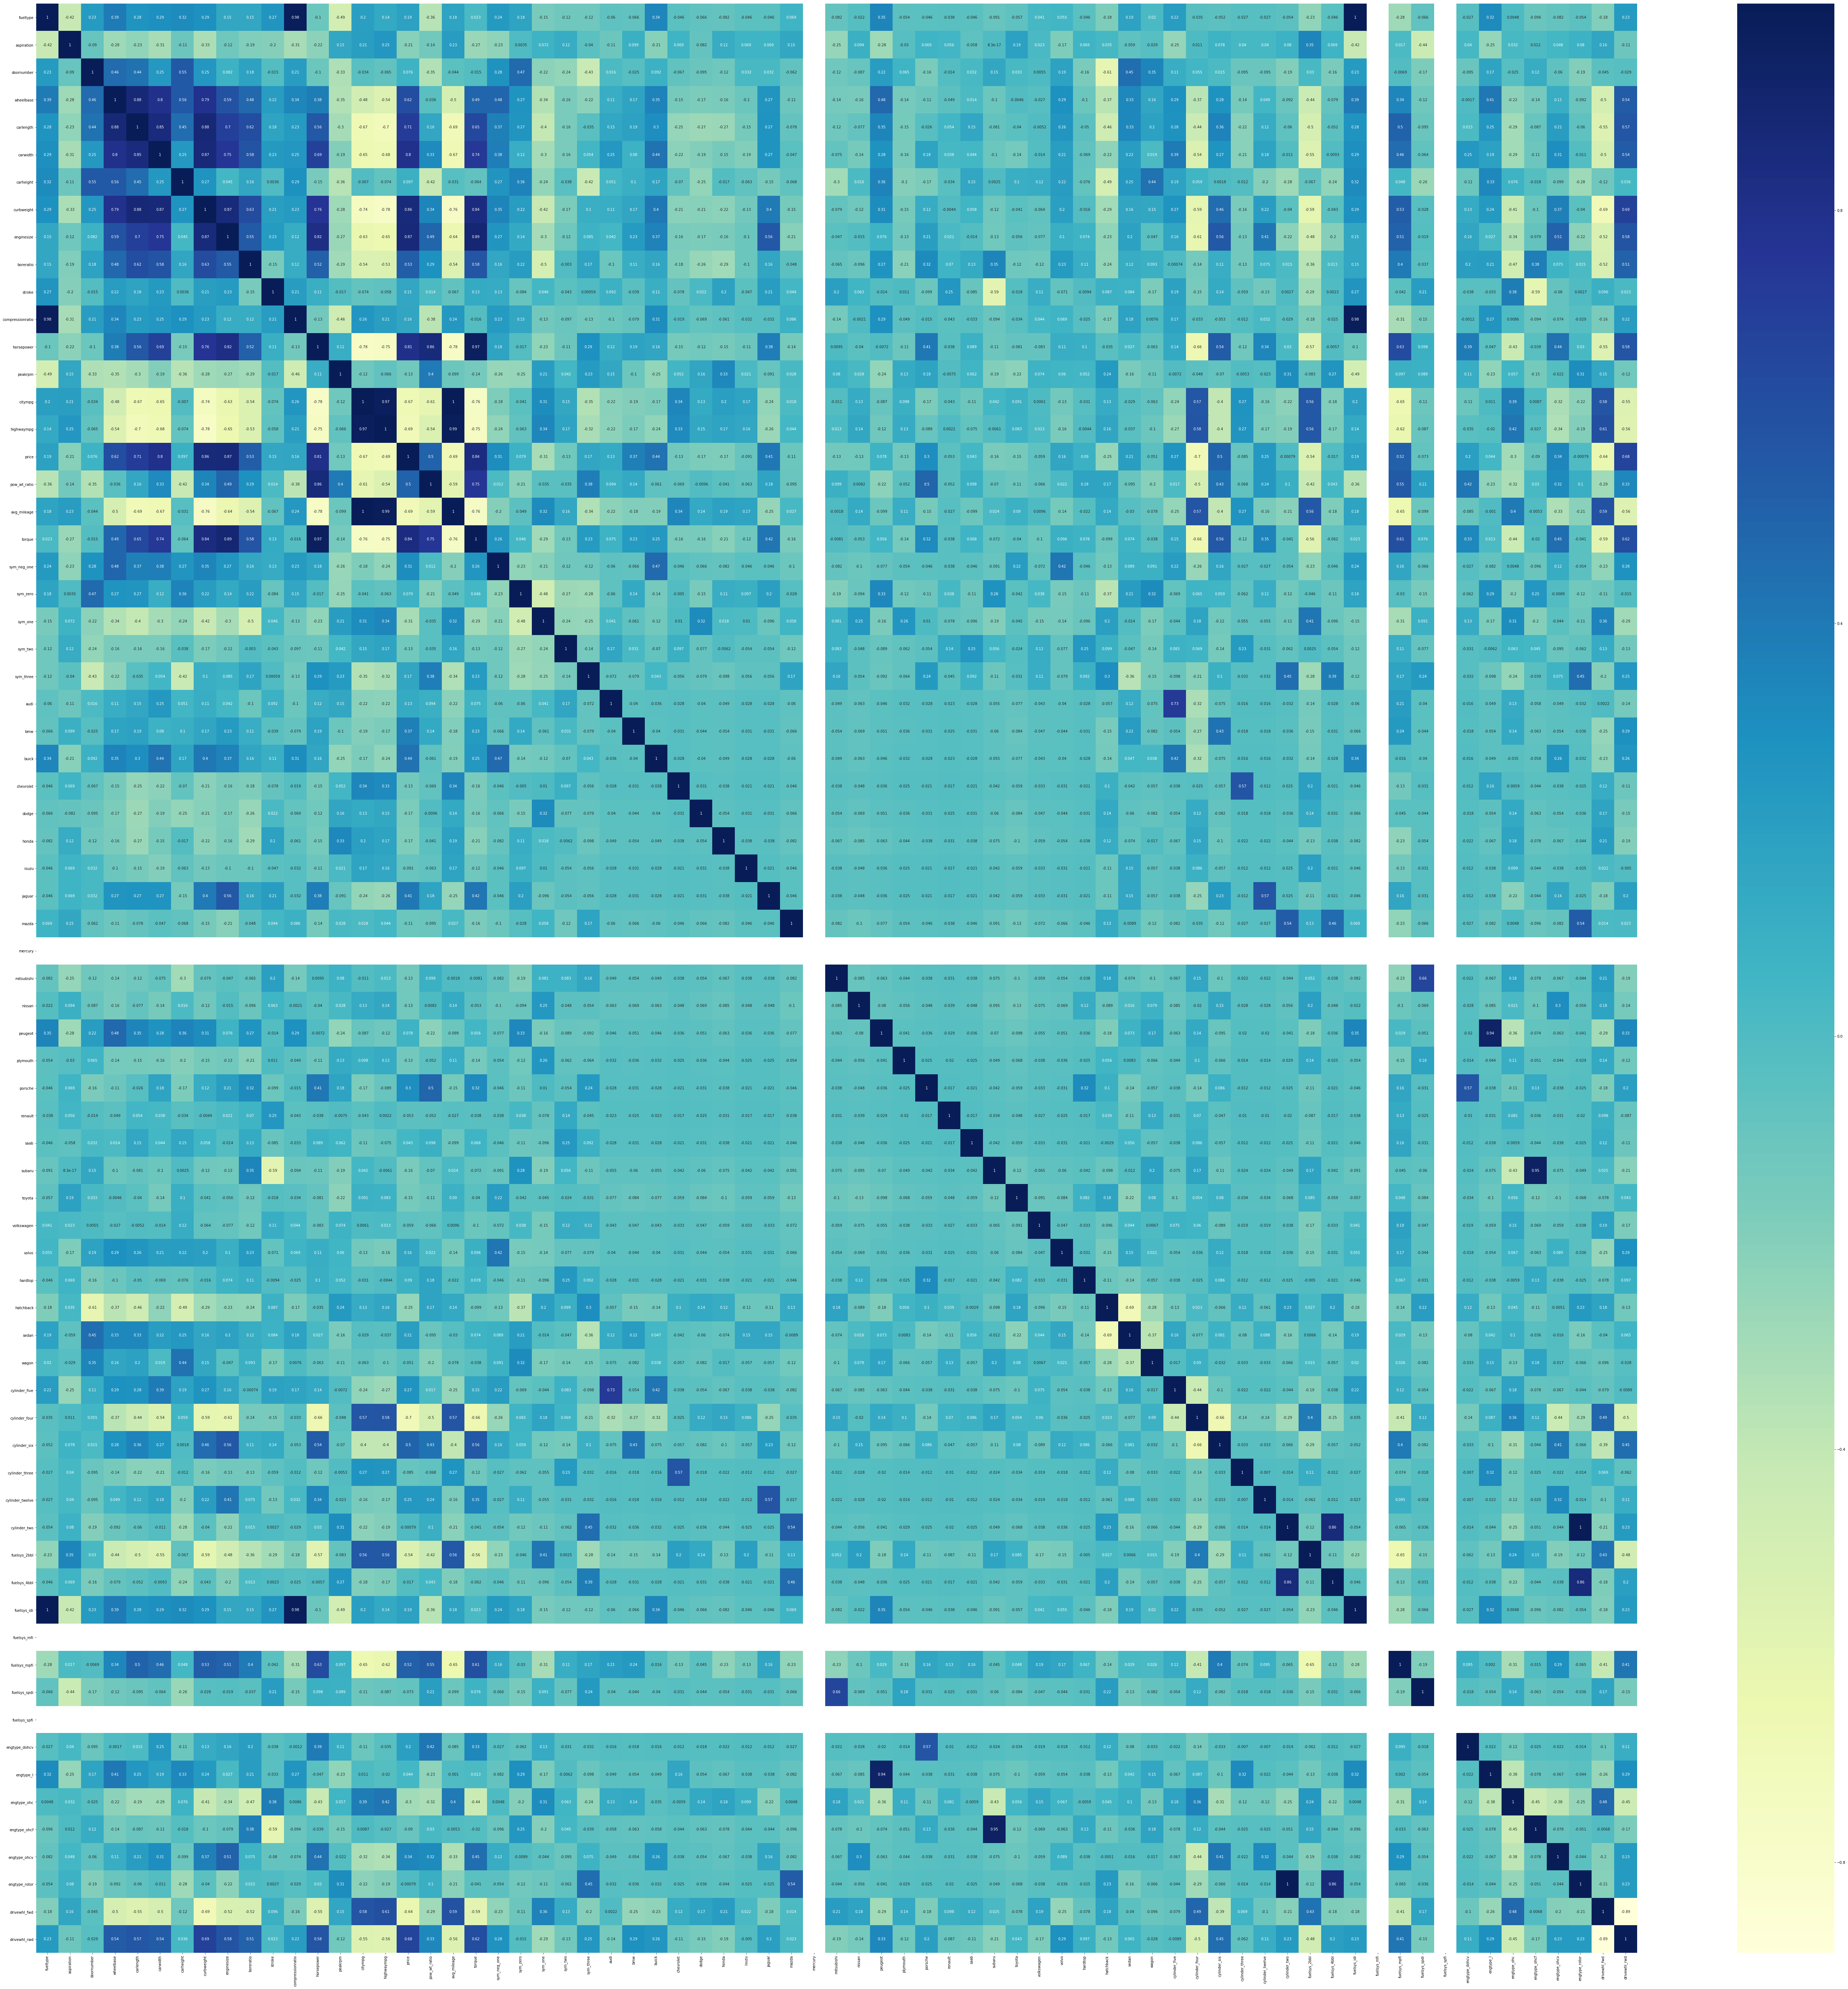

In [65]:
plt.figure(figsize = (100, 100))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Looking at the correlation matrix as it is, there is not much we can draw in terms of insight because we have over 50 variables! Let's look at it in form of a table

In [66]:
df_train.corr()

,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,fuelsys_spdi,fuelsys_spfi,engtype_dohcv,engtype_l,engtype_ohc,engtype_ohcf,engtype_ohcv,engtype_rotor,drivewhl_fwd,drivewhl_rwd
fueltype,1.000000,-4.185461e-01,0.231626,0.393481,0.275886,0.293054,0.320231,0.288561,0.145095,0.153727,...,-0.066178,NaN,-0.026537,0.318709,0.004762,-0.095709,-0.081954,-0.053644,-0.184655,0.227232
aspiration,-0.418546,1.000000e+00,-0.089642,-0.277414,-0.234925,-0.307027,-0.111052,-0.325634,-0.115050,-0.186639,...,-0.443937,NaN,0.039559,-0.251126,0.031944,0.011890,0.047510,0.079968,0.164489,-0.110608
doornumber,0.231626,-8.964215e-02,1.000000,0.462232,0.436645,0.245854,0.554436,0.251023,0.081539,0.183979,...,-0.165569,NaN,-0.094565,0.171980,-0.025029,0.116173,-0.060031,-0.191160,-0.044536,-0.028713
wheelbase,0.393481,-2.774139e-01,0.462232,1.000000,0.877909,0.796888,0.555524,0.792815,0.588600,0.482386,...,-0.117645,NaN,-0.001739,0.406623,-0.222195,-0.135755,0.108535,-0.092032,-0.499023,0.538721
carlength,0.275886,-2.349248e-01,0.436645,0.877909,1.000000,0.846307,0.454721,0.881495,0.702794,0.620436,...,-0.094743,NaN,0.015262,0.253571,-0.293690,-0.086593,0.211595,-0.059682,-0.549343,0.567900
carwidth,0.293054,-3.070265e-01,0.245854,0.796888,0.846307,1.000000,0.245022,0.873884,0.754925,0.580962,...,-0.063850,NaN,0.245699,0.193688,-0.290778,-0.108346,0.305924,-0.010753,-0.500816,0.539726
carheight,0.320231,-1.110516e-01,0.554436,0.555524,0.454721,0.245022,1.000000,0.272388,0.045042,0.160835,...,-0.263335,NaN,-0.105596,0.334046,0.075929,-0.017898,-0.099329,-0.276412,-0.119790,0.035752
curbweight,0.288561,-3.256339e-01,0.251023,0.792815,0.881495,0.873884,0.272388,1.000000,0.865102,0.625759,...,-0.027766,NaN,0.127791,0.237870,-0.412737,-0.100522,0.370775,-0.040089,-0.691805,0.687311
enginesize,0.145095,-1.150503e-01,0.081539,0.588600,0.702794,0.754925,0.045042,0.865102,1.000000,0.545157,...,-0.018578,NaN,0.160398,0.027066,-0.337783,-0.079374,0.506634,-0.217946,-0.524765,0.582234
boreratio,0.153727,-1.866387e-01,0.183979,0.482386,0.620436,0.580962,0.160835,0.625759,0.545157,1.000000,...,-0.036809,NaN,0.204110,0.214048,-0.473985,0.375397,0.074544,0.014733,-0.517488,0.507992


Let's go ahead with building a linear model to identify the most significant variables and then we can proceed with feature selection

### Step 3: Building a Linear Model

**Divide the Train data into X and y sets for model building**

In [67]:
y_train = df_train.pop('price')
X_train = df_train

Fit a regression line through the training data using `statsmodels`.

In [68]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [69]:
lr.params

const              -1.329070e-01
fueltype            2.706161e-04
aspiration         -9.381593e-02
doornumber          1.304279e-02
wheelbase           2.216062e-01
carlength          -1.698042e-01
carwidth            1.851455e-01
carheight          -1.812435e-01
curbweight          1.983185e-02
enginesize          2.015001e+00
boreratio          -6.033714e-01
stroke             -1.016886e-01
compressionratio   -3.371732e-02
horsepower          1.951533e+00
peakrpm            -1.249791e-01
citympg            -3.858187e+00
highwaympg         -2.435097e+00
pow_wt_ratio       -5.541113e-01
avg_mileage         6.295927e+00
torque             -1.397636e+00
sym_neg_one         7.577774e-02
sym_zero            6.244119e-02
sym_one             6.012384e-02
sym_two             5.549423e-02
sym_three           4.382911e-02
audi                6.298276e-02
bmw                 3.590201e-01
buick               1.044399e-01
chevrolet          -4.794067e-02
dodge              -1.078062e-01
          

In [70]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     55.13
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.30e-46
Time:                        21:53:48   Log-Likelihood:                 291.06
No. Observations:                 143   AIC:                            -452.1
Df Residuals:                      78   BIC:                            -259.5
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1329      0.232  

Based on the above summary of our model, we see that the R-squared value is pretty high. However, there appears to be several insignificant variables in our model based on the t-statistic and the p-values (being greater than 0.5). This means we can go ahead and get rid of some of those variables

Let's **check the VIF**
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [71]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,fueltype,inf
63,engtype_l,inf
52,cylinder_three,inf
54,cylinder_two,inf
57,fuelsys_idi,inf
36,peugeot,inf
67,engtype_rotor,inf
17,avg_mileage,5.898006e+05
14,citympg,2.100118e+05
15,highwaympg,9.686112e+04


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

Considering we're dealing with a really large set of data, it wouldn't be feasible of treating them 1 at a time. In that case, we'll opt for **Recursive Feature Elimination** To come down to about a smaller number of variables that explain the highest variance in the data and exhibit the least multicollinearity. Post that, we'll go into fine-tuning the model manually to end up with the final set of variables

In [73]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [74]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let's try using the recursive feature elimination based on mean squared error to identify the optimal number of features that we should huse in our model

In [75]:
from sklearn.feature_selection import RFECV

# Create recursive feature eliminator that scores features by mean squared errors
rfecv = RFECV(estimator=lm, step=1, scoring='neg_mean_squared_error', cv=3)

# Fit recursive feature eliminator 
rfecv.fit(X_train, y_train)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 14
Best features : Index(['carwidth', 'enginesize', 'stroke', 'horsepower', 'citympg',
       'pow_wt_ratio', 'avg_mileage', 'torque', 'bmw', 'subaru',
       'cylinder_three', 'cylinder_twelve', 'cylinder_two', 'engtype_ohcf'],
      dtype='object')


The output of the scorer tells us that the optimal number of features that we should consider are 14.
Let us take an upper bound of 20 variables and then later fine-tune the model using other features such as the VIF, P-values and adjusted R-squared to identify the final set of variables

In [76]:
# running RFE
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [77]:
zip(X_train.columns,rfe.support_,rfe.ranking_)

In [78]:
# Identify all the top 15 columns that were returned by our RFE model
col = X_train.columns[rfe.support_]
col

Index(['carlength', 'carwidth', 'enginesize', 'boreratio', 'stroke',
       'horsepower', 'citympg', 'highwaympg', 'pow_wt_ratio', 'avg_mileage',
       'torque', 'bmw', 'subaru', 'cylinder_five', 'cylinder_four',
       'cylinder_three', 'cylinder_twelve', 'cylinder_two', 'engtype_ohcf',
       'engtype_rotor'],
      dtype='object')

In [79]:
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'wheelbase', 'carheight',
       'curbweight', 'compressionratio', 'peakrpm', 'sym_neg_one', 'sym_zero',
       'sym_one', 'sym_two', 'sym_three', 'audi', 'buick', 'chevrolet',
       'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'toyota',
       'volkswagen', 'volvo', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'cylinder_six', 'fuelsys_2bbl', 'fuelsys_4bbl', 'fuelsys_idi',
       'fuelsys_mfi', 'fuelsys_mpfi', 'fuelsys_spdi', 'fuelsys_spfi',
       'engtype_dohcv', 'engtype_l', 'engtype_ohc', 'engtype_ohcv',
       'drivewhl_fwd', 'drivewhl_rwd'],
      dtype='object')

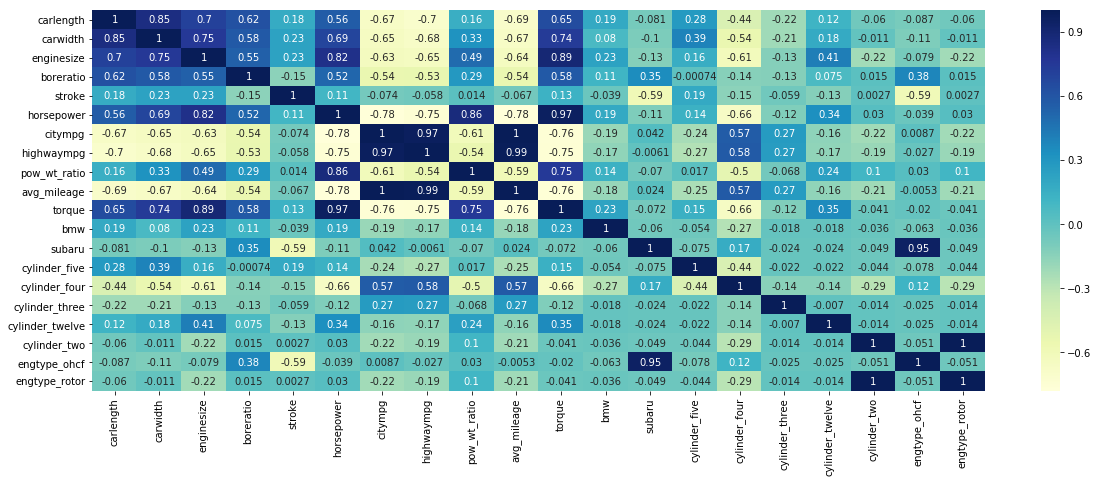

In [80]:
plt.figure(figsize = (20, 7))
sns.heatmap(X_train[col].corr(), annot = True, cmap="YlGnBu")
plt.show()

Based on the correlation matrix - (avg_mileage and city_mpg), (horsepower and torque), (horsepower and engsize), (enginetype_rotor and cylinder_two), (subaru and engtype_ohcf) are strongly correlated (~1). Let's go ahead and drop these i.e. horsepower, city_mpg, engsize, enginetype_rotor, subaru

In [81]:
X_train.columns

Index(['fueltype', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'pow_wt_ratio', 'avg_mileage', 'torque', 'sym_neg_one',
       'sym_zero', 'sym_one', 'sym_two', 'sym_three', 'audi', 'bmw', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'cylinder_five', 'cylinder_four',
       'cylinder_six', 'cylinder_three', 'cylinder_twelve', 'cylinder_two',
       'fuelsys_2bbl', 'fuelsys_4bbl', 'fuelsys_idi', 'fuelsys_mfi',
       'fuelsys_mpfi', 'fuelsys_spdi', 'fuelsys_spfi', 'engtype_dohcv',
       'engtype_l', 'engtype_ohc', 'engtype_ohcf', 'engtype_ohcv',
       'engtype_rotor', 'drivewhl_fwd', 'drivewh

In [82]:
X_train.drop(['highwaympg','horsepower', 'citympg', 'enginesize', 'engtype_rotor', 'subaru', 'carwidth'], axis=1, inplace=True)

In [83]:
col = ['carlength', 'boreratio', 'stroke','pow_wt_ratio', 'avg_mileage',
       'torque', 'bmw', 'cylinder_five', 'cylinder_four',
       'cylinder_three', 'cylinder_twelve', 'cylinder_two', 'engtype_ohcf']

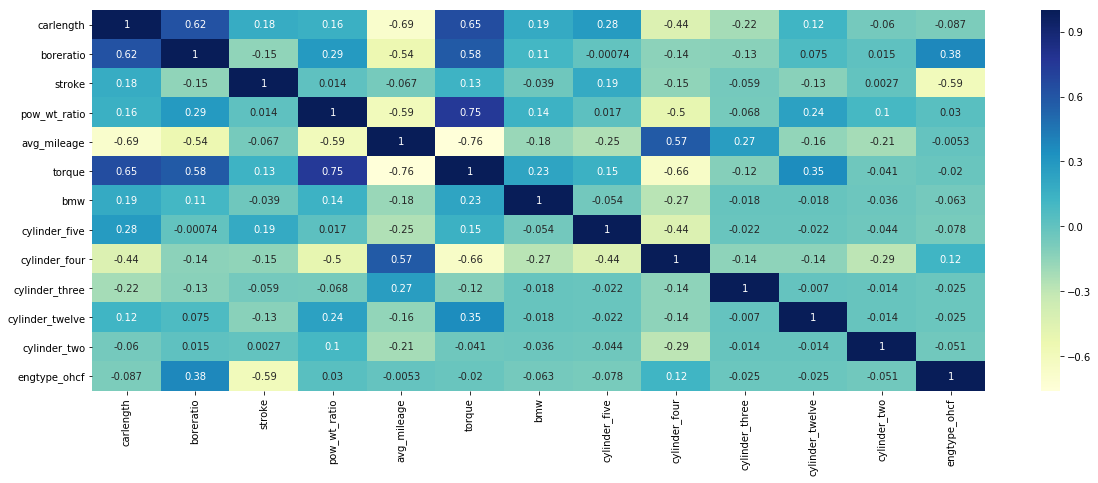

In [84]:
plt.figure(figsize = (20, 7))
sns.heatmap(X_train[col].corr(), annot = True, cmap="YlGnBu")
plt.show()

Now that we've sorted all the strong correlations that existed in our dataset, let us go ahead and build the model on the remaining columns to look at the how our model performs/if any further refinements are needed

**Build the model using statsmodel.api based on the final set of features identified post RFE and strong-correlation treatment**

In [85]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [86]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [87]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [88]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     48.25
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.26e-43
Time:                        21:53:53   Log-Likelihood:                 143.40
No. Observations:                 143   AIC:                            -258.8
Df Residuals:                     129   BIC:                            -217.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0426      0.097     

As we can see, despite having removed over 50 variables, the adjusted R-squared is still pretty high! This means that we still have the majority of variables that are explaining good variance in the data

We can see that a few variables like wheelbase, highwaympg, torque are insignificant

Let's go ahead and look at the VIF for the above model

In [89]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,inf
13,engtype_ohcf,1351.830000
11,cylinder_twelve,1238.760000
6,torque,677.290000
9,cylinder_four,450.330000
4,pow_wt_ratio,203.160000
10,cylinder_three,157.620000
8,cylinder_five,139.850000
7,bmw,127.620000
3,stroke,116.110000


We observe that avg_mileage is one variable that has both a high VIF and is also insignificant based on the p-value. Hence we can go ahead and omit this variable

In [90]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('avg_mileage', 1)

# Build a second fitted model
X_train_rfe = sm.add_constant(X_train_rfe)
lr_3 = sm.OLS(y_train, X_train_rfe).fit()

# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     52.53
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           6.68e-44
Time:                        21:53:53   Log-Likelihood:                 143.23
No. Observations:                 143   AIC:                            -260.5
Df Residuals:                     130   BIC:                            -221.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0806      0.069     

In [91]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,inf
11,cylinder_two,1238.760000
6,bmw,677.290000
9,cylinder_three,450.330000
4,pow_wt_ratio,203.160000
10,cylinder_twelve,157.620000
8,cylinder_four,139.850000
7,cylinder_five,127.620000
3,stroke,116.110000
12,engtype_ohcf,68.560000


Another variable that is somewhat insignificant and is depicting a high VIF is cylinder_twelve. Let's omit that too

In [92]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('cylinder_twelve', 1)

# Build a second fitted model
X_train_rfe = sm.add_constant(X_train_rfe)
lr_3 = sm.OLS(y_train, X_train_rfe).fit()

# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     57.63
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           9.53e-45
Time:                        21:53:53   Log-Likelihood:                 143.11
No. Observations:                 143   AIC:                            -262.2
Df Residuals:                     131   BIC:                            -226.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0830      0.068      1.

In [93]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,inf
11,engtype_ohcf,1238.760000
6,bmw,677.290000
9,cylinder_three,450.330000
4,pow_wt_ratio,203.160000
10,cylinder_two,157.620000
8,cylinder_four,139.850000
7,cylinder_five,127.620000
3,stroke,116.110000
5,torque,58.020000


cylinder_three is one variable that is insignificant and depicting a high VIF - let's omit that

In [94]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('cylinder_three', 1)

# Build a second fitted model
X_train_rfe = sm.add_constant(X_train_rfe)
lr_3 = sm.OLS(y_train, X_train_rfe).fit()

# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     63.69
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.35e-45
Time:                        21:53:53   Log-Likelihood:                 142.94
No. Observations:                 143   AIC:                            -263.9
Df Residuals:                     132   BIC:                            -231.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0665      0.061      1.081

stroke variable now seems to have become insignificant hence we can drop it

In [95]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('stroke', 1)

# Build a second fitted model
X_train_rfe = sm.add_constant(X_train_rfe)
lr_3 = sm.OLS(y_train, X_train_rfe).fit()

# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     71.25
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.62e-46
Time:                        21:53:54   Log-Likelihood:                 142.90
No. Observations:                 143   AIC:                            -265.8
Df Residuals:                     133   BIC:                            -236.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0566      0.051      1.106

cylinder_two is now an insignificant variable which we can get rid of

In [96]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('cylinder_two', 1)

# Build a second fitted model
X_train_rfe = sm.add_constant(X_train_rfe)
lr_3 = sm.OLS(y_train, X_train_rfe).fit()

# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     80.59
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.95e-47
Time:                        21:53:54   Log-Likelihood:                 142.77
No. Observations:                 143   AIC:                            -267.5
Df Residuals:                     134   BIC:                            -240.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0494      0.049      1.012

cylinder_five  seems to have become insignificant and henc we can drop that too

In [97]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('cylinder_five', 1)

# Build a second fitted model
X_train_rfe = sm.add_constant(X_train_rfe)
lr_3 = sm.OLS(y_train, X_train_rfe).fit()

# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     91.18
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           5.14e-48
Time:                        21:53:54   Log-Likelihood:                 141.74
No. Observations:                 143   AIC:                            -267.5
Df Residuals:                     135   BIC:                            -243.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0645      0.048      1.351

engtype_ohcf has become insignificant and hence let's remove it

In [98]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('engtype_ohcf', 1)

# Build a second fitted model
X_train_rfe = sm.add_constant(X_train_rfe)
lr_3 = sm.OLS(y_train, X_train_rfe).fit()

# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     104.7
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.76e-48
Time:                        21:53:54   Log-Likelihood:                 140.35
No. Observations:                 143   AIC:                            -266.7
Df Residuals:                     136   BIC:                            -246.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0610      0.048      1.272

boreratio has become insignificant and hence can be removed

In [99]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('boreratio', 1)

# Build a second fitted model
X_train_rfe = sm.add_constant(X_train_rfe)
lr_3 = sm.OLS(y_train, X_train_rfe).fit()

# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     124.6
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.54e-49
Time:                        21:53:54   Log-Likelihood:                 139.44
No. Observations:                 143   AIC:                            -266.9
Df Residuals:                     137   BIC:                            -249.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0569      0.048      1.186

In [100]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,inf
4,bmw,203.160000
3,torque,116.110000
5,cylinder_four,58.020000
1,carlength,36.010000
2,pow_wt_ratio,9.310000


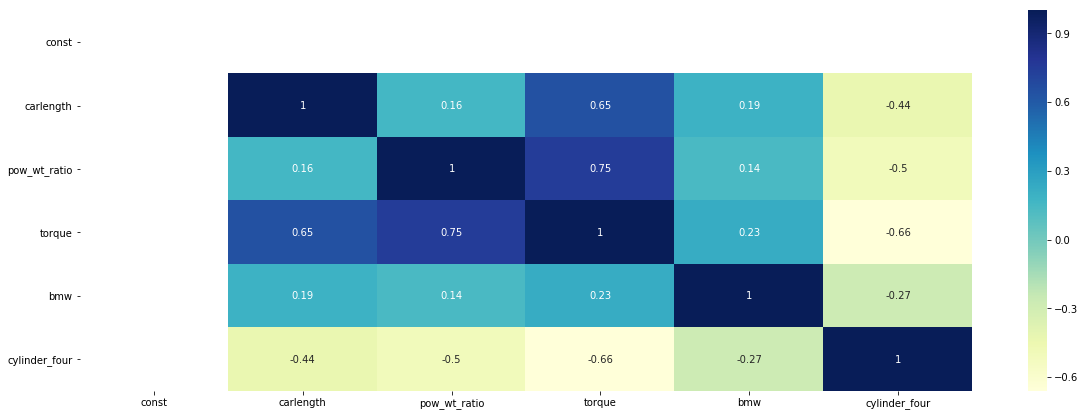

In [101]:
# Lets have a look at the new correlation matric for the above table
plt.figure(figsize = (20, 7))
sns.heatmap(X_train_rfe.corr(), annot = True, cmap="YlGnBu")
plt.show()

**The above variables seem to be significant enough, and the corresponding R-squared value is also high hence we can infer that the varriance is being explained pretty well by these variables.<br>
Looking at the F-statistic, it is pretty high and the corresponding p-value is almost 0 suggesting that it is significant.<br>
We've also taken into account the multicollinearity that may exist based on the VIF values.**

Let's go ahead and perform residual analysis to ensure that the assumptions of linear regression are being satisfied

### Step 4: Residual Analysis

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [102]:
y_train_price = lr_3.predict(X_train_rfe)

In [103]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\vyom\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Errors')

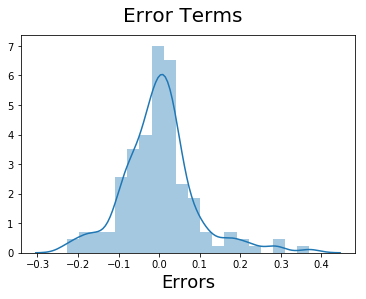

In [104]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

**As we can see, the error terms are following a normal distribution with mean at 0**

### Step 5: Making the Prediction

**Applying the scaling on the test set**

In [105]:
# Apply scaler() to all the columns except the 'categorical variables variables
df_test[num_var] = scaler.fit_transform(df_test[num_var])
df_test[['price']] = scaler.fit_transform(df_test[['price']])

In [106]:
df_test.head()

,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,fuelsys_spdi,fuelsys_spfi,engtype_dohcv,engtype_l,engtype_ohc,engtype_ohcf,engtype_ohcv,engtype_rotor,drivewhl_fwd,drivewhl_rwd
160,0,1,1,0.265306,0.341732,0.200000,0.346154,0.132148,0.082969,0.515873,...,0,0,0,0,1,0,0,0,1,0
186,0,1,1,0.311953,0.426772,0.315789,0.605769,0.219125,0.131004,0.515873,...,0,0,0,0,1,0,0,0,1,0
59,0,1,0,0.355685,0.522835,0.421053,0.413462,0.271985,0.187773,0.674603,...,0,0,0,0,1,0,0,0,1,0
165,0,1,0,0.230321,0.379528,0.157895,0.307692,0.214320,0.082969,0.555556,...,0,0,0,0,0,0,0,0,0,1
140,0,1,0,0.195335,0.200000,0.136842,0.605769,0.202307,0.126638,0.857143,...,0,0,0,0,0,1,0,0,0,0


**Divide into X_test y_test**

In [107]:
y_test = df_test.pop('price')
X_test = df_test

In [108]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns[1:]]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [109]:
# Making predictions
y_pred = lr_3.predict(X_test_new)

In [110]:
list(y_pred.head())

[0.07418959096494147,
 0.11613452372357845,
 0.17970372017872904,
 0.07317895469998272,
 0.103973354168117]

### Step 6: Evaluating the Model

Text(0,0.5,'y_pred')

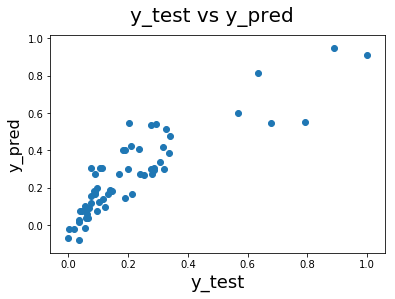

In [111]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Based on the above data, we can see that the model predictions seem to be pretty good

In [112]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [113]:
#Returns the mean squared error; we'll take a square root
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(round(r2_score(y_test, y_pred),1))

0.11897832631908327
0.7


The R-squared for our test set is **0.7** which means that our model has managed to capture majority of the variance in the test dataset too

Performing the **final step of the assignment as mentioned to calculate the R-square score**

In [114]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6765561596040577